In [26]:
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt
import os
import json
import pandas as pd
import seaborn as sns

In [27]:
!ls /data/workflows/US-Prr-STEP4-SA-manual/sample_000000000/output

AVLN_yearly_eq.nc    INNPP_yearly_eq.nc       ORGN_yearly_eq.nc   restart-eq.nc
CMTNUM_yearly_eq.nc  LTRFALC_yearly_eq.nc     RH_yearly_eq.nc	  restart-pr.nc
DEEPC_yearly_eq.nc   MINEC_yearly_eq.nc       SHLWC_yearly_eq.nc  run_status.nc
GPP_yearly_eq.nc     MOSSDEATHC_yearly_eq.nc  VEGC_yearly_eq.nc
INGPP_yearly_eq.nc   NPP_yearly_eq.nc	      VEGN_yearly_eq.nc


In [72]:
def get_sample_df(sample_dir):
    gpp0_ds = nc.Dataset(os.path.join(sample_dir, 'output/GPP_yearly_eq.nc'))
    gpp0 = gpp0_ds.variables['GPP'][:, 0 , 0, 1]

    gpp1_ds = nc.Dataset(os.path.join(sample_dir, 'output/GPP_yearly_eq.nc'))
    gpp1 = gpp1_ds.variables['GPP'][:, 1 , 0, 1]

    gpp2_ds = nc.Dataset(os.path.join(sample_dir, 'output/GPP_yearly_eq.nc'))
    gpp2 = gpp2_ds.variables['GPP'][:, 2 , 0, 1]

    gpp3_ds = nc.Dataset(os.path.join(sample_dir, 'output/GPP_yearly_eq.nc'))
    gpp3 = gpp3_ds.variables['GPP'][:, 3 , 0, 1]

    gpp4_ds = nc.Dataset(os.path.join(sample_dir, 'output/GPP_yearly_eq.nc'))
    gpp4 = gpp4_ds.variables['GPP'][:, 4 , 0, 1]
    
    litter0_ds = nc.Dataset(os.path.join(sample_dir, 'output/LTRFALC_yearly_eq.nc'))
    litter0 = litter0_ds.variables['LTRFALC'][:, 0 , 0, 1]

    litter1_ds = nc.Dataset(os.path.join(sample_dir, 'output/LTRFALC_yearly_eq.nc'))
    litter1 = litter1_ds.variables['LTRFALC'][:, 1 , 0, 1]

    litter2_ds = nc.Dataset(os.path.join(sample_dir, 'output/LTRFALC_yearly_eq.nc'))
    litter2 = litter2_ds.variables['LTRFALC'][:, 2 , 0, 1]

    litter3_ds = nc.Dataset(os.path.join(sample_dir, 'output/LTRFALC_yearly_eq.nc'))
    litter3 = litter3_ds.variables['LTRFALC'][:, 3 , 0, 1]

    litter4_ds = nc.Dataset(os.path.join(sample_dir, 'output/LTRFALC_yearly_eq.nc'))
    litter4 = litter4_ds.variables['LTRFALC'][:, 4 , 0, 1]

    rh_ds = nc.Dataset(os.path.join(sample_dir, 'output/RH_yearly_eq.nc'))
    rh = rh_ds.variables['RH'][:, 0, 1]

    shlwc_ds = nc.Dataset(os.path.join(sample_dir, 'output/SHLWC_yearly_eq.nc'))
    shlwc = shlwc_ds.variables['SHLWC'][:,0, 1]

    deepc_ds = nc.Dataset(os.path.join(sample_dir, 'output/DEEPC_yearly_eq.nc'))
    deepc = deepc_ds.variables['DEEPC'][:,0, 1]

    minec_ds = nc.Dataset(os.path.join(sample_dir, 'output/MINEC_yearly_eq.nc'))
    minec = minec_ds.variables['MINEC'][:,0, 1]


    year= range(0, len(gpp))

    tem_output_df = pd.DataFrame({'year': year, 'GPP0': gpp0, 'GPP1': gpp1, 'GPP2': gpp2, 'GPP3': gpp3, 'GPP4': gpp4,
                                  'LITTER0': litter0, 'LITTER1': litter1, 'LITTER2': litter2, 'LITTER3': litter3, 'LITTER4': litter4,
                                  'RH': rh, 'SHLWC':shlwc, 'DEEPC':deepc, 'MINEC':minec})
                          
    return tem_output_df

In [73]:
sample0_df=get_sample_df('/data/workflows/US-Prr-STEP4-SA-manual/sample_000000000/')
sample1_df=get_sample_df('/data/workflows/US-Prr-STEP4-SA-manual/sample_000000001/')
sample2_df=get_sample_df('/data/workflows/US-Prr-STEP4-SA-manual/sample_000000002/')
sample3_df=get_sample_df('/data/workflows/US-Prr-STEP4-SA-manual/sample_000000003/')

<AxesSubplot:xlabel='year', ylabel='LITTER0'>

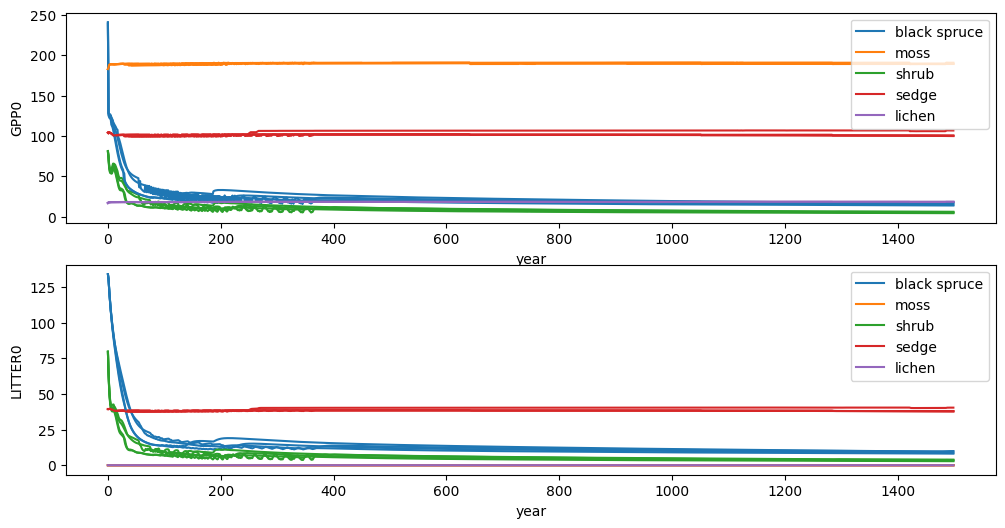

In [95]:
fig, axes=plt.subplots(2,1, figsize=(12,6))
sns.lineplot(data=sample0_df, x='year', y='GPP0', ax=axes[0], label='black spruce', color=sns.color_palette()[0])
sns.lineplot(data=sample0_df, x='year', y='GPP1', ax=axes[0], label='moss', color=sns.color_palette()[1])
sns.lineplot(data=sample0_df, x='year', y='GPP2', ax=axes[0], label='shrub', color=sns.color_palette()[2])
sns.lineplot(data=sample0_df, x='year', y='GPP3', ax=axes[0], label='sedge', color=sns.color_palette()[3])
sns.lineplot(data=sample0_df, x='year', y='GPP4', ax=axes[0], label='lichen', color=sns.color_palette()[4])

sns.lineplot(data=sample1_df, x='year', y='GPP0', ax=axes[0], color=sns.color_palette()[0])
sns.lineplot(data=sample1_df, x='year', y='GPP1', ax=axes[0], color=sns.color_palette()[1])
sns.lineplot(data=sample1_df, x='year', y='GPP2', ax=axes[0], color=sns.color_palette()[2])
sns.lineplot(data=sample1_df, x='year', y='GPP3', ax=axes[0], color=sns.color_palette()[3])
sns.lineplot(data=sample1_df, x='year', y='GPP4', ax=axes[0], color=sns.color_palette()[4])

sns.lineplot(data=sample2_df, x='year', y='GPP0', ax=axes[0], color=sns.color_palette()[0])
sns.lineplot(data=sample2_df, x='year', y='GPP1', ax=axes[0], color=sns.color_palette()[1])
sns.lineplot(data=sample2_df, x='year', y='GPP2', ax=axes[0], color=sns.color_palette()[2])
sns.lineplot(data=sample2_df, x='year', y='GPP3', ax=axes[0], color=sns.color_palette()[3])
sns.lineplot(data=sample2_df, x='year', y='GPP4', ax=axes[0], color=sns.color_palette()[4])

sns.lineplot(data=sample3_df, x='year', y='GPP0', ax=axes[0], color=sns.color_palette()[0])
sns.lineplot(data=sample3_df, x='year', y='GPP1', ax=axes[0], color=sns.color_palette()[1])
sns.lineplot(data=sample3_df, x='year', y='GPP2', ax=axes[0], color=sns.color_palette()[2])
sns.lineplot(data=sample3_df, x='year', y='GPP3', ax=axes[0], color=sns.color_palette()[3])
sns.lineplot(data=sample3_df, x='year', y='GPP4', ax=axes[0], color=sns.color_palette()[4])

sns.lineplot(data=sample0_df, x='year', y='LITTER0', ax=axes[1], label='black spruce', color=sns.color_palette()[0])
sns.lineplot(data=sample0_df, x='year', y='LITTER1', ax=axes[1], label='moss', color=sns.color_palette()[1])
sns.lineplot(data=sample0_df, x='year', y='LITTER2', ax=axes[1], label='shrub', color=sns.color_palette()[2])
sns.lineplot(data=sample0_df, x='year', y='LITTER3', ax=axes[1], label='sedge', color=sns.color_palette()[3])
sns.lineplot(data=sample0_df, x='year', y='LITTER4', ax=axes[1], label='lichen', color=sns.color_palette()[4])

sns.lineplot(data=sample1_df, x='year', y='LITTER0', ax=axes[1], color=sns.color_palette()[0])
sns.lineplot(data=sample1_df, x='year', y='LITTER1', ax=axes[1], color=sns.color_palette()[1])
sns.lineplot(data=sample1_df, x='year', y='LITTER2', ax=axes[1], color=sns.color_palette()[2])
sns.lineplot(data=sample1_df, x='year', y='LITTER3', ax=axes[1], color=sns.color_palette()[3])
sns.lineplot(data=sample1_df, x='year', y='LITTER4', ax=axes[1], color=sns.color_palette()[4])

sns.lineplot(data=sample2_df, x='year', y='LITTER0', ax=axes[1], color=sns.color_palette()[0])
sns.lineplot(data=sample2_df, x='year', y='LITTER1', ax=axes[1], color=sns.color_palette()[1])
sns.lineplot(data=sample2_df, x='year', y='LITTER2', ax=axes[1], color=sns.color_palette()[2])
sns.lineplot(data=sample2_df, x='year', y='LITTER3', ax=axes[1], color=sns.color_palette()[3])
sns.lineplot(data=sample2_df, x='year', y='LITTER4', ax=axes[1], color=sns.color_palette()[4])

sns.lineplot(data=sample3_df, x='year', y='LITTER0', ax=axes[1], color=sns.color_palette()[0])
sns.lineplot(data=sample3_df, x='year', y='LITTER1', ax=axes[1], color=sns.color_palette()[1])
sns.lineplot(data=sample3_df, x='year', y='LITTER2', ax=axes[1], color=sns.color_palette()[2])
sns.lineplot(data=sample3_df, x='year', y='LITTER3', ax=axes[1], color=sns.color_palette()[3])
sns.lineplot(data=sample3_df, x='year', y='LITTER4', ax=axes[1], color=sns.color_palette()[4])



<AxesSubplot:xlabel='year', ylabel='RH'>

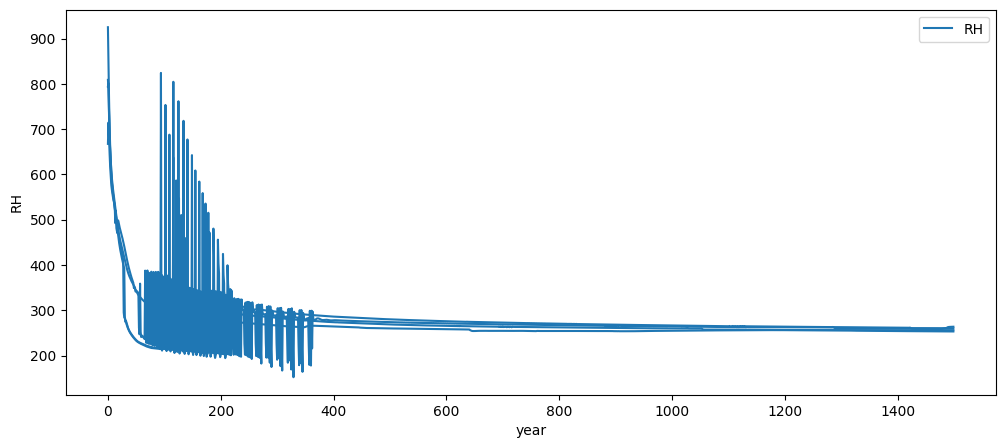

In [94]:
fig, axes=plt.subplots(figsize=(12,5))

sns.lineplot(data=sample0_df, x='year', y='RH', label='RH', color=sns.color_palette()[0])
sns.lineplot(data=sample1_df, x='year', y='RH', color=sns.color_palette()[0])
sns.lineplot(data=sample2_df, x='year', y='RH', color=sns.color_palette()[0])
sns.lineplot(data=sample3_df, x='year', y='RH', color=sns.color_palette()[0])

<AxesSubplot:xlabel='year', ylabel='SHLWC'>

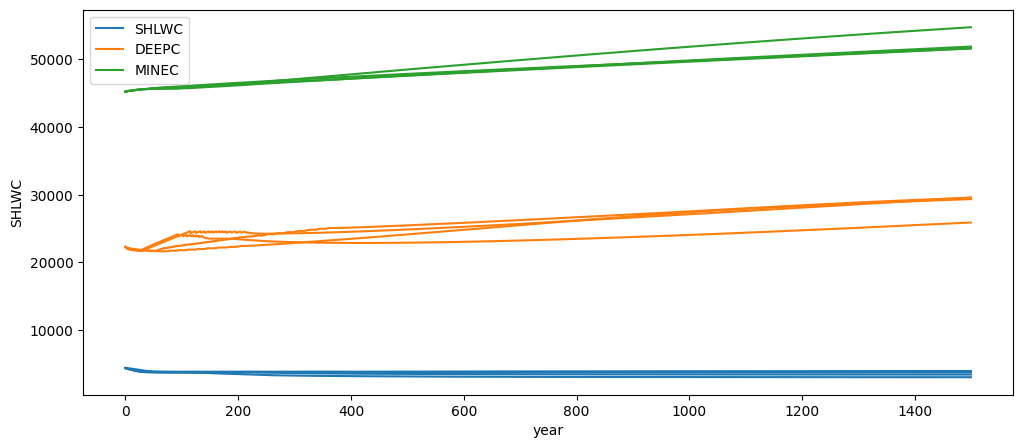

In [86]:
fig, axes=plt.subplots(figsize=(12,5))
sns.lineplot(data=sample0_df, x='year', y='SHLWC', label='SHLWC', color=sns.color_palette()[0])
sns.lineplot(data=sample0_df, x='year', y='DEEPC', label='DEEPC', color=sns.color_palette()[1])
sns.lineplot(data=sample0_df, x='year', y='MINEC', label='MINEC', color=sns.color_palette()[2])

sns.lineplot(data=sample1_df, x='year', y='SHLWC', color=sns.color_palette()[0])
sns.lineplot(data=sample1_df, x='year', y='DEEPC', color=sns.color_palette()[1])
sns.lineplot(data=sample1_df, x='year', y='MINEC', color=sns.color_palette()[2])

sns.lineplot(data=sample2_df, x='year', y='SHLWC', color=sns.color_palette()[0])
sns.lineplot(data=sample2_df, x='year', y='DEEPC', color=sns.color_palette()[1])
sns.lineplot(data=sample2_df, x='year', y='MINEC', color=sns.color_palette()[2])

sns.lineplot(data=sample3_df, x='year', y='SHLWC', color=sns.color_palette()[0])
sns.lineplot(data=sample3_df, x='year', y='DEEPC', color=sns.color_palette()[1])
sns.lineplot(data=sample3_df, x='year', y='MINEC', color=sns.color_palette()[2])

